# Parkinson Disease Detection - Exploratory Data Analysis

Notebook ini untuk melakukan analisis awal terhadap dataset Parkinson.

## Steps:
1. Load Data
2. Data Overview
3. Missing Values Analysis
4. Statistical Analysis
5. Distribution Analysis
6. Correlation Analysis
7. Feature Importance

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## 1. Load Data

**PENTING:** Silakan letakkan dataset Parkinson Anda di folder `data/` dengan nama `parkinsons.csv` atau sesuaikan path di bawah.

In [14]:
# Load dataset
# Sesuaikan nama file dengan dataset Anda
DATA_PATH = '../data/parkinsons.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print(f'✓ Dataset loaded successfully')
    print(f'  Shape: {df.shape}')
except FileNotFoundError:
    print('✗ File tidak ditemukan!')
    print(f'  Silakan letakkan dataset di: {DATA_PATH}')
    print('\nCara menggunakan:')
    print('  1. Copy dataset Parkinson Anda ke folder data/')
    print('  2. Rename menjadi parkinsons.csv atau sesuaikan DATA_PATH di atas')
    df = None

✓ Dataset loaded successfully
  Shape: (195, 24)


## 2. Data Overview

In [15]:
if df is not None:
    # Display first rows
    print('First 5 rows:')
    display(df.head())
    
    # Dataset info
    print('\nDataset Info:')
    df.info()

First 5 rows:


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-nul

In [16]:
if df is not None:
    # Data types
    print('Data Types:')
    print(df.dtypes)
    
    # Columns
    print(f'\nTotal Columns: {len(df.columns)}')
    print('\nColumn Names:')
    print(df.columns.tolist())

Data Types:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Total Columns: 24

Column Names:
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 's

## 3. Missing Values Analysis

In [17]:
if df is not None:
    # Check missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Percentage': missing_pct
    })
    
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        print('Missing Values Found:')
        display(missing_df)
    else:
        print('✓ No missing values found!')

✓ No missing values found!


## 4. Statistical Analysis

In [18]:
if df is not None:
    # Descriptive statistics
    print('Descriptive Statistics:')
    display(df.describe())

Descriptive Statistics:


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA  \
count        195.000000    195.000000    195.000000  195.000000   195.000000   
mean           0.282251      0.015664      0.017878    0.024081     0.046993   
std            0.194877      0.010153      0.012024    0.016947     0.030459   
min            0.085000      0.004550      0.005700    0.007190     0.013640   
25%            0.148500      0.008245      0.009580    0.013080     0.024735   
50%            0.221000      0.012790      0.013470    0.018260     0.038360   
75%            0.350000      0.020265      0.022380    0.029400     0.060795   
max            1.302000      0.056470      0.079400    0.137780     0.169420   

              NHR         HNR      status        RPDE         DFA     spread1  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.753846    0.498536    0.718099   -5.684397   
std      0.040418    4.425764    0.431878    0.103942    0.055336    1.090208   
min      0.000650    8.441000    0.000000    0.256570    0.574282   -7.964984   
25%      0.005925   19.198000    1.000000    0.421306    0.674758   -6.450096   
50%      0.011660   22.085000    1.000000    0.495954    0.722254   -5.720868   
75%      0.025640   25.075500    1.000000    0.587562    0.761881   -5.046192   
max      0.314820   33.047000    1.000000    0.685151    0.825288   -2.434031   

          spread2          D2         PPE  
count  195.000000  195.000000  195.000000  
mean     0.226510    2.381826    0.206552  
std      0.083406    0.382799    0.090119  
min      0.006274    1.423287    0.044539  
25%      0.174351    2.099125    0.137451  
50%      0.218885    2.361532    0.194052  
75%      0.279234    2.636456    0.252980  
max      0.450493    3.671155    0.527367

## 5. Distribution Analysis

Target column found: status

Target Distribution:
status
1    147
0     48
Name: count, dtype: int64

Percentage:
status
1    75.384615
0    24.615385
Name: proportion, dtype: float64


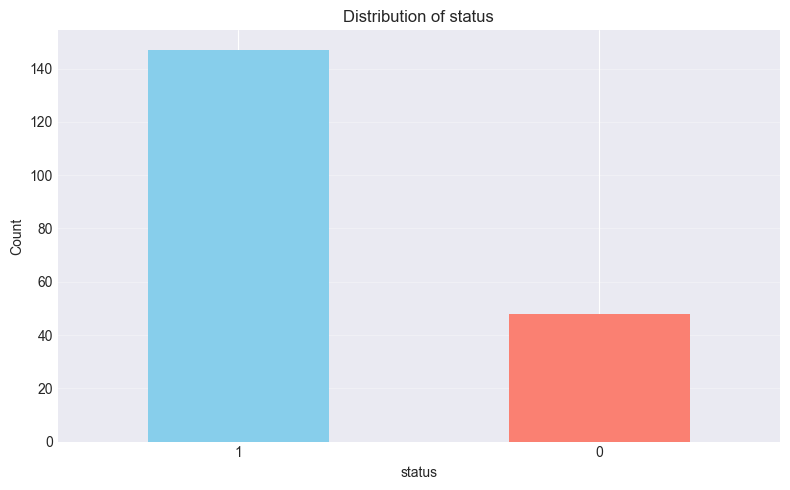

In [20]:
if df is not None:
    # Cari kolom target (biasanya bernama 'status', 'target', 'label', dll)
    possible_targets = ['status', 'target', 'label', 'class', 'diagnosis']
    target_col = None
    
    for col in possible_targets:
        if col in df.columns:
            target_col = col
            break
    
    if target_col:
        print(f'Target column found: {target_col}')
        print(f'\nTarget Distribution:')
        print(df[target_col].value_counts())
        print(f'\nPercentage:')
        print(df[target_col].value_counts(normalize=True) * 100)
        
        # Plot distribution
        plt.figure(figsize=(8, 5))
        df[target_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title(f'Distribution of {target_col}')
        plt.xlabel(target_col)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print('Target column not found. Please specify manually.')
        print('Available columns:', df.columns.tolist())

Total numeric features: 22


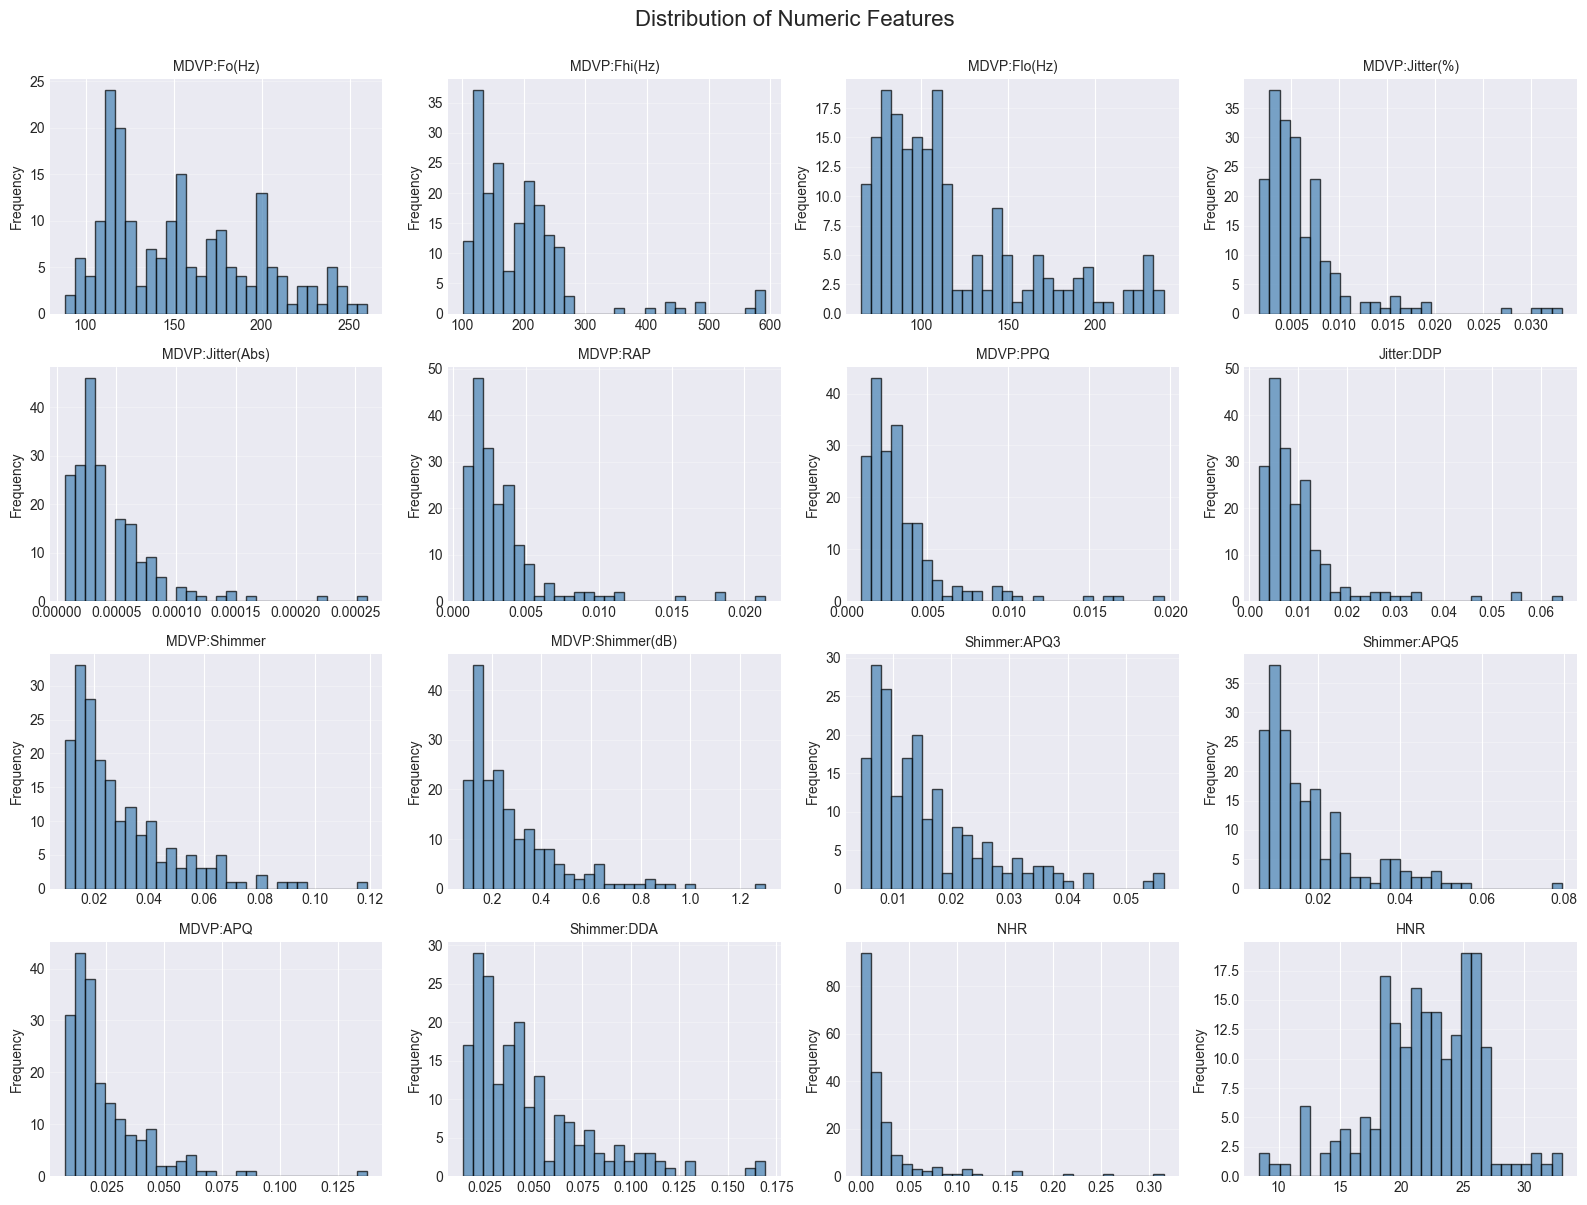

In [8]:
if df is not None:
    # Distribution of numeric features
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove target column if exists
    if target_col and target_col in numeric_cols:
        numeric_cols.remove(target_col)
    
    print(f'Total numeric features: {len(numeric_cols)}')
    
    # Plot distributions (first 16 features)
    n_features = min(16, len(numeric_cols))
    fig, axes = plt.subplots(4, 4, figsize=(16, 12))
    axes = axes.ravel()
    
    for idx, col in enumerate(numeric_cols[:n_features]):
        axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(col, fontsize=10)
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide unused subplots
    for idx in range(n_features, 16):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Numeric Features', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

## 6. Correlation Analysis

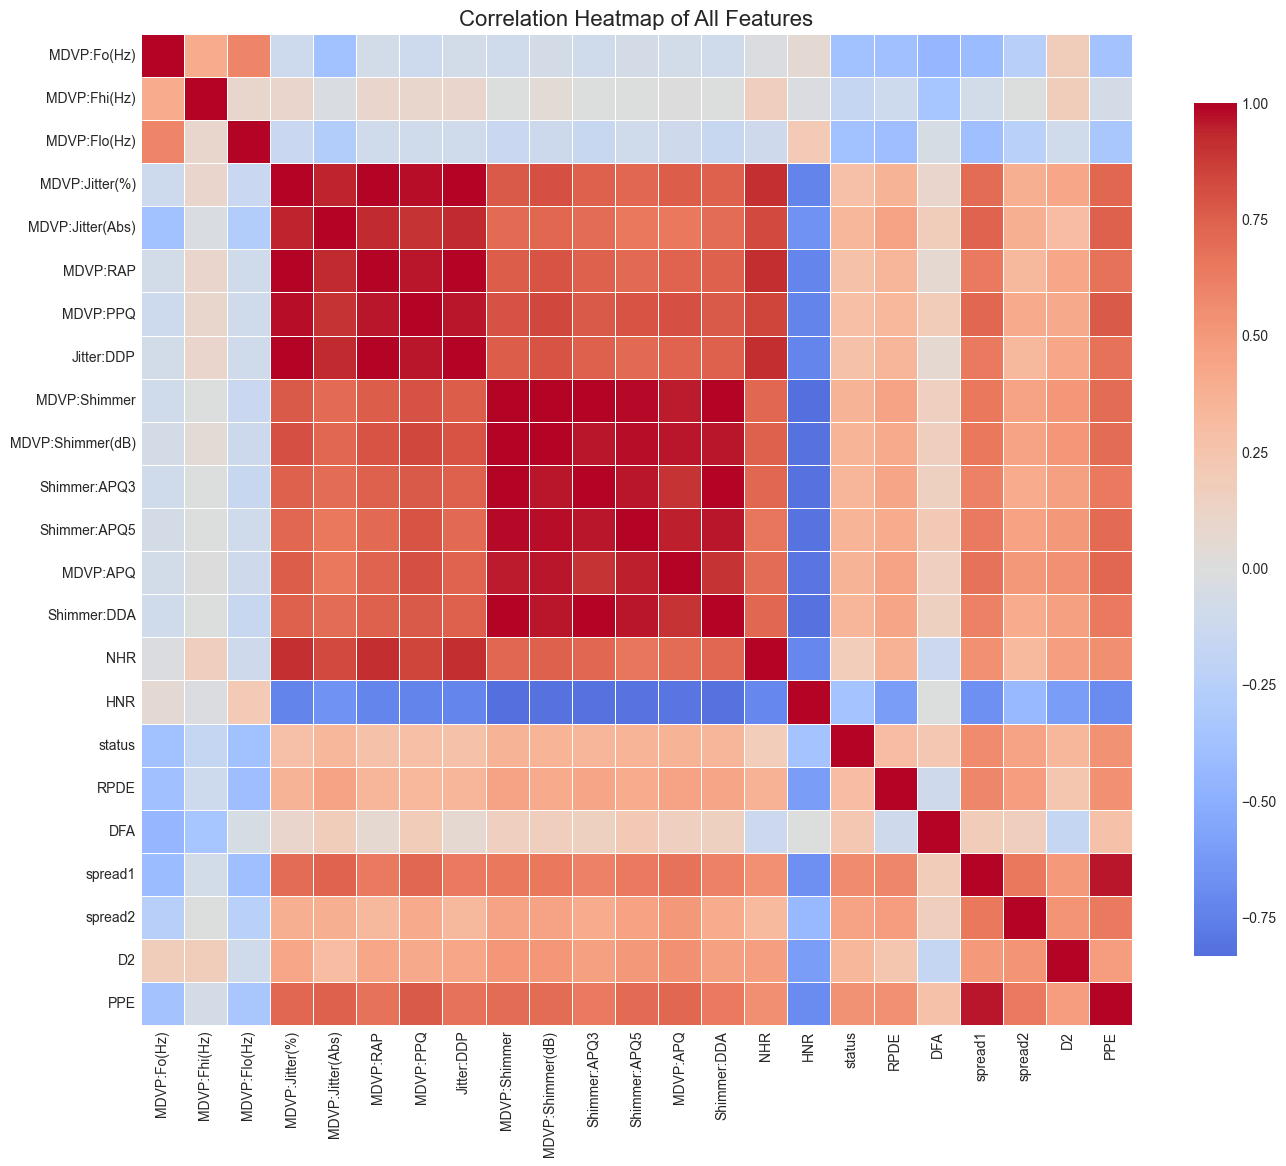

In [9]:
if df is not None:
    # Correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    correlation = numeric_df.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()

Top 10 Features Correlated with status:
status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
Name: status, dtype: float64


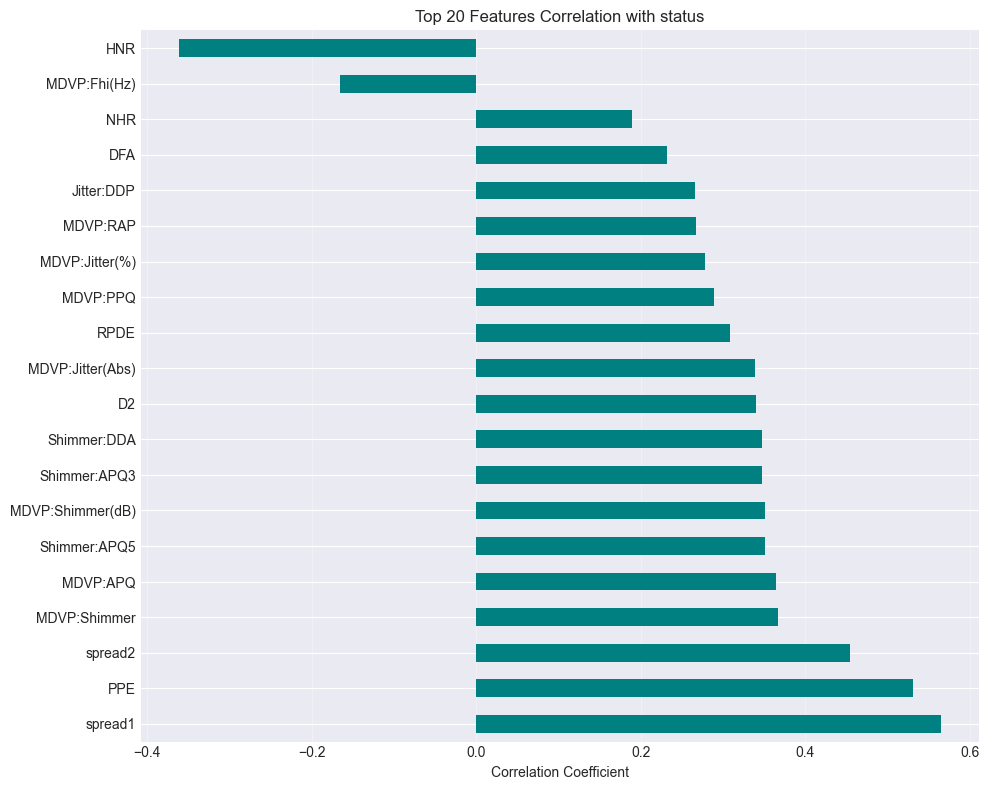

In [10]:
if df is not None and target_col:
    # Correlation with target
    target_corr = correlation[target_col].sort_values(ascending=False)
    
    print(f'Top 10 Features Correlated with {target_col}:')
    print(target_corr.head(11))  # 11 because target itself will be included
    
    # Plot
    plt.figure(figsize=(10, 8))
    target_corr[1:21].plot(kind='barh', color='teal')  # Top 20, excluding target itself
    plt.title(f'Top 20 Features Correlation with {target_col}')
    plt.xlabel('Correlation Coefficient')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 7. Feature Analysis by Target

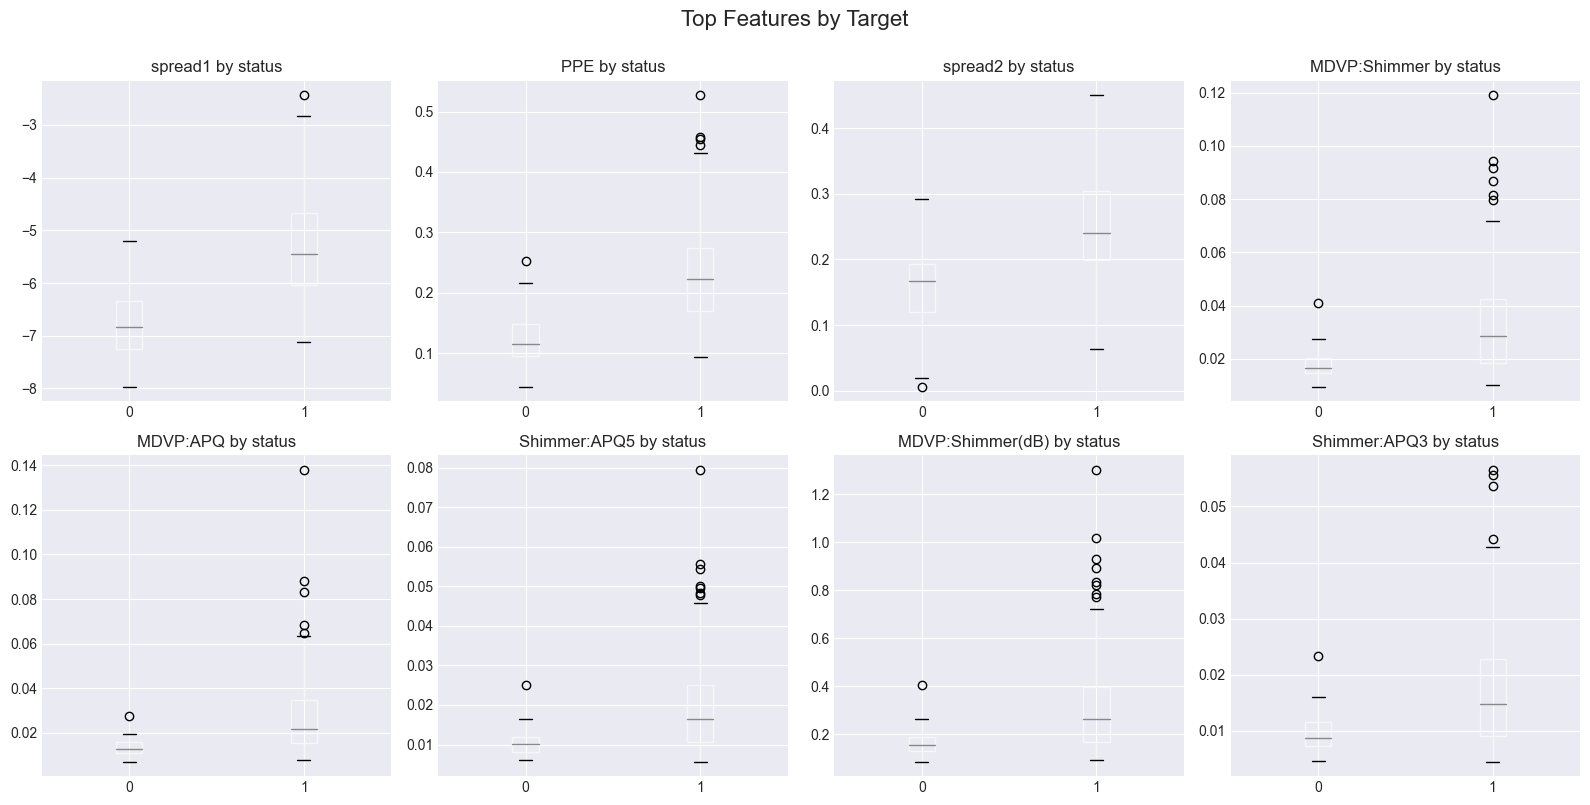

In [11]:
if df is not None and target_col:
    # Box plots for top features
    top_features = target_corr[1:9].index.tolist()  # Top 8 features
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()
    
    for idx, feature in enumerate(top_features):
        df.boxplot(column=feature, by=target_col, ax=axes[idx])
        axes[idx].set_title(f'{feature} by {target_col}')
        axes[idx].set_xlabel('')
    
    plt.suptitle('Top Features by Target', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

## Summary & Next Steps

Dari analisis di atas, kita dapat:
1. ✓ Memahami struktur dataset
2. ✓ Mengidentifikasi missing values (jika ada)
3. ✓ Melihat distribusi features
4. ✓ Mengetahui korelasi antar features

**Next Steps:**
- Lanjut ke notebook `02_model_training.ipynb` untuk melatih model

In [12]:
# Save processed info for next notebook
if df is not None and target_col:
    import json
    
    config = {
        'data_path': DATA_PATH,
        'target_column': target_col,
        'total_samples': len(df),
        'total_features': len(df.columns) - 1,
        'class_distribution': df[target_col].value_counts().to_dict()
    }
    
    with open('../config.json', 'w') as f:
        json.dump(config, f, indent=2)
    
    print('✓ Configuration saved to config.json')

✓ Configuration saved to config.json
